# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
clients:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
places:
  0: LIEU(TEXT)
  1: REGION(TEXT)
producers:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
production:
  0: NP(NUM)
  1: NV(NUM)
  2: QTE(NUM)
sales:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
wines:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we will use **`%%sql`** magic for our queries

In [4]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

First we clean the database from previous use.

In [5]:
%%sql sqlite:///wine.db

-- Remove all tables previously created
DROP TABLE IF EXISTS wines;
DROP TABLE IF EXISTS production;
DROP TABLE IF EXISTS producers;
DROP TABLE IF EXISTS sales;
DROP TABLE IF EXISTS clients;
DROP TABLE IF EXISTS places;

DROP TABLE IF EXISTS RBA;
DROP TABLE IF EXISTS RBB;

-- Remove all views previously created
DROP VIEW IF EXISTS bons_buveurs;
DROP VIEW IF EXISTS buveurs_asec;
DROP VIEW IF EXISTS buveurs_achats;
DROP VIEW IF EXISTS q83pl;
DROP VIEW IF EXISTS q83pl_2;

-- Part 3
DROP TABLE IF EXISTS Users;

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

 We check that the DB contained now only 2 tables: *Master1* and *Master2*.

In [6]:
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)


Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [7]:
%%sql sqlite:///wine.db
    
-- ** wines table **
-- *****************
DROP TABLE IF EXISTS wines;

-- Create wines table
CREATE TABLE wines AS
SELECT DISTINCT NV, CRU, DEGRE, MILL
FROM MASTER1
WHERE NV IS NOT NULL;


-- ** producers table **
-- *********************
DROP TABLE IF EXISTS producers;

-- Create producers table
CREATE TABLE producers AS
SELECT DISTINCT NP, NOM, PRENOM, REGION
FROM MASTER1
WHERE NP IS NOT NULL;

-- ** production table **
-- **********************
DROP TABLE IF EXISTS production;

-- Create production table
CREATE TABLE production AS
SELECT DISTINCT NP, NV, QTE
FROM MASTER1
WHERE NV IS NOT NULL AND NP IS NOT NULL;

-- ** sales table **
-- *****************
DROP TABLE IF EXISTS sales;

-- Create sales table
CREATE TABLE sales AS
SELECT DISTINCT NV, NB, DATES, LIEU, QTE
FROM MASTER2
WHERE NV IS NOT NULL 
    AND NB IS NOT NULL
    AND DATES IS NOT NULL
    AND LIEU IS NOT NULL;

-- ** clients table **
-- *******************
DROP TABLE IF EXISTS clients;

-- Create clients table
CREATE TABLE clients AS
SELECT DISTINCT NB, NOM, PRENOM, TYPE
FROM MASTER2
WHERE NB IS NOT NULL;

-- ** places table **
-- ******************
DROP TABLE IF EXISTS places;

-- Create places table
CREATE TABLE places AS
SELECT DISTINCT LIEU, REGION
FROM MASTER2
WHERE LIEU IS NOT NULL;

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [8]:
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
clients:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
places:
  0: LIEU(TEXT)
  1: REGION(TEXT)
producers:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
production:
  0: NP(NUM)
  1: NV(NUM)
  2: QTE(NUM)
sales:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
wines:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [9]:
%%sql sqlite:///wine.db

-- drop existing view
DROP VIEW IF EXISTS bons_buveurs;

-- create new view
CREATE VIEW bons_buveurs AS
SELECT clients.NB, clients.NOM, clients.PRENOM, clients.TYPE
FROM clients
WHERE clients.TYPE IN ('moyen', 'gros');

Done.
Done.


[]

In [10]:
%%sql sqlite:///wine.db
-- Test

SELECT * FROM bons_buveurs ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [11]:
%%sql sqlite:///wine.db

-- drop existing view
DROP VIEW IF EXISTS buveurs_asec;

-- create new view
CREATE VIEW buveurs_asec AS
SELECT clients.NB, clients.NOM, clients.PRENOM, clients.TYPE
FROM clients
WHERE clients.NB NOT IN (SELECT sales.NB 
                         FROM sales
                         GROUP BY sales.NB);

Done.
Done.


[]

In [12]:
%%sql sqlite:///wine.db
-- Test

SELECT * FROM buveurs_asec ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [13]:
%%sql sqlite:///wine.db

-- drop existing view
DROP VIEW IF EXISTS buveurs_achats;

-- create new view
CREATE VIEW buveurs_achats AS
SELECT clients.NB, clients.NOM, clients.PRENOM, clients.TYPE
FROM clients
WHERE clients.NB IN (SELECT sales.NB 
                     FROM sales
                     GROUP BY sales.NB);

Done.
Done.


[]

#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [14]:
%%sql sqlite:///wine.db
-- Test

SELECT * FROM buveurs_achats ORDER BY nb;

Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [15]:
%%sql sqlite:///wine.db

-- drop existing view
DROP VIEW IF EXISTS q83pl;

-- create new view
CREATE VIEW q83pl AS
SELECT sales.LIEU, wines.CRU, SUM(sales.QTE) AS QTE_BUE
FROM wines
    JOIN sales ON wines.NV = sales.NV
WHERE sales.DATES LIKE "1983%"
GROUP BY sales.LIEU, wines.CRU;

Done.
Done.


[]

In [16]:
%%sql sqlite:///wine.db
-- Test

SELECT * FROM q83pl;

Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

##### *Answer:*

It is technically possible to define a view with ascending order over attribute `QTE`. However it will not produce the **same view** (i.e. same output order) as we do not sort on same attribute: `QTE_BUE` is the sum of attribute `QTE` over `sales.LIEU` and `wines.CRU`.
See below the comparison between the results obtained from view `q83pl_2` and from *view* `q83pl_3`.

Note that it is possible to define the same view with ascending order over the attribute `QTE_BUE`; for that we just have to add to the previous request, the following instruction:

```sql
ORDER BY QTE_BUE ASC; 
```

However it may not the best practice to include a sort (as `ORDER BY` is a costly operation) in the definition of the *view* as we could use it for other/various requests. It could be preferable either to keep the *view* definition simple as possible, and add the `ORDER BY` instruction to the request over the *view*.

Let's illustrate these 2 ways (see below):
 1. by defining a new "specialized" *view* `q83pl_2` which sorts the results by ascending order over the attribute `QTE_BUE`,
 2. by simply using the original `q83pl` view.

The choice between the 2 ways depends on the context/application. Of course both approaches provide the same result.

We define a *view* `q83pl_3` sorting the instances with ascending order over the attribute `QTE`, the result is different that those obtain from *view* `q83pl_2`.

In [17]:
%%sql sqlite:///wine.db

-- drop existing view
DROP VIEW IF EXISTS q83pl_2;

-- create new view
CREATE VIEW q83pl_2 AS
SELECT sales.LIEU, wines.CRU, SUM(sales.QTE) AS QTE_BUE
FROM wines
    JOIN sales ON wines.NV = sales.NV
WHERE sales.DATES LIKE "1983%"
GROUP BY sales.LIEU, wines.CRU
ORDER BY QTE_BUE ASC;

Done.
Done.


[]

In [18]:
%%sql sqlite:///wine.db

SELECT * FROM q83pl_2;

Done.


LIEU,CRU,QTE_BUE
PARIS,Coteaux du Tricastin,1
RENNES,Mercurey,1
LYON,Julienas,2
CAEN,Seyssel,3
PARIS,Pouilly Vinzelles,3
PARIS,Beaujolais Primeur,4
LILLE,Pommard,5
LYON,Beaujolais Villages,10
ROCQUENCOURT,Saint Amour,80
ROCQUENCOURT,Beaujolais Villages,260


In [19]:
%%sql sqlite:///wine.db

SELECT * FROM q83pl ORDER BY QTE_BUE;

Done.


LIEU,CRU,QTE_BUE
PARIS,Coteaux du Tricastin,1
RENNES,Mercurey,1
LYON,Julienas,2
CAEN,Seyssel,3
PARIS,Pouilly Vinzelles,3
PARIS,Beaujolais Primeur,4
LILLE,Pommard,5
LYON,Beaujolais Villages,10
ROCQUENCOURT,Saint Amour,80
ROCQUENCOURT,Beaujolais Villages,260


In [20]:
%%sql sqlite:///wine.db

-- drop existing view
DROP VIEW IF EXISTS q83pl_3;

-- create new view
CREATE VIEW q83pl_3 AS
SELECT sales.LIEU, wines.CRU, SUM(sales.QTE) AS QTE_BUE
FROM wines
    JOIN sales ON wines.NV = sales.NV
WHERE sales.DATES LIKE "1983%"
GROUP BY sales.LIEU, wines.CRU
ORDER BY QTE;

Done.
Done.


[]

In [21]:
%%sql sqlite:///wine.db

SELECT * FROM q83pl_3;

Done.


LIEU,CRU,QTE_BUE
PARIS,Coteaux du Tricastin,1
RENNES,Mercurey,1
LYON,Julienas,2
CAEN,Seyssel,3
PARIS,Pouilly Vinzelles,3
PARIS,Beaujolais Primeur,4
LILLE,Pommard,5
LYON,Beaujolais Villages,10
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [22]:
%%sql sqlite:///wine.db

-- ** RBB table **
-- ***************
DROP TABLE IF EXISTS RBB;

-- Create clients table
CREATE TABLE RBB AS
SELECT *
FROM bons_buveurs
ORDER by bons_buveurs.NB;

Done.
Done.


[]

In [23]:
%%sql sqlite:///wine.db
--Test

SELECT * FROM RBB;

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [24]:
%%sql sqlite:///wine.db

SELECT clients.NB, clients.NOM, clients.PRENOM, clients.TYPE, SUM(sales.QTE) as total
FROM clients
    JOIN sales ON clients.NB = sales.NB
WHERE clients.TYPE IN ('petit', 'moyen')
GROUP BY (clients.NB)
HAVING total > 100

Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [25]:
%%sql sqlite:///wine.db

UPDATE clients
SET TYPE = 'gros'
WHERE clients.NB IN (
    SELECT c.NB
    FROM clients AS c
        JOIN sales AS s ON c.NB = s.NB
    WHERE c.TYPE IN ('petit', 'moyen')
    GROUP BY c.NB
    HAVING SUM(s.QTE) > 100
);

4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

Let's focus on the list of tuples selected for update, i.e. the tupples with attribute `NB` having values: *(2, 5, 9, 44)*.

In [26]:
%%sql sqlite:///wine.db

SELECT *
FROM RBB
WHERE RBB.NB IN (2, 5, 9, 44);

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen


In [27]:
%%sql sqlite:///wine.db

SELECT *
FROM bons_buveurs
WHERE bons_buveurs.NB IN (2, 5, 9, 44);

Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
44,Gide,Andre,gros
9,Ajar,Emile,gros
5,Audiberti,Jacques,gros


##### *Answer:*

Comparing the content of *table* `RBB` and the *view* `bons_buveurs` after the update, we observe that:

 1. the *table* `RBB` is not affected by the update performed on *table* `clients`: the `TYPE` of client (`NB`=2) is not changed.
 2. the *view* `bons_buveurs` reflects the update performed on *table* `clients`:  the `TYPE` of 4 clients in the *table* `clients` has been updated to **gros**.

The *table* `RBB` is a "physical" copy of *table* `clients`, then it is fully independent/separated, i.e. updates of *table* `clients` does not affect it.

The "virtual" *view* `bons_buveurs` is the result set of a stored query on the data, it is computed on-demand (here, after the update of *table* `clients`); as a result, it is always synchronized/up-to-date with the table (here, *table* `clients`) to which it refers.

#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [28]:
%%sql sqlite:///wine.db

-- ** RBA table **
-- ***************
DROP TABLE IF EXISTS RBA;

-- Create clients table
CREATE TABLE RBA AS
SELECT *
FROM buveurs_asec;

Done.
Done.


[]

In [29]:
%%sql sqlite:///wine.db
-- Test

SELECT * FROM RBA

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [30]:
%%sql sqlite:///wine.db

INSERT INTO RBA VALUES (101, 'Mensch', 'Thomas', 'moyen');

1 rows affected.


[]

In [31]:
%%sql sqlite:///wine.db
-- Test

SELECT * FROM RBA;

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [32]:
%%sql sqlite:///wine.db

-- Test
SELECT * FROM buveurs_asec;

Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


##### *Answer:* 

We observe that:
 1. the new tuple added to *table* `RBA` with the instruction:
 ```sql
 INSERT INTO RBA VALUES (101, 'Mensch', 'Thomas', 'moyen');
 ```
  is, of course, in the content of the *table* `RBA`.
  
 2.  But this change is not reflected in the result of the *view* `buveurs_asec`.

The observations are not surprising. The "INSERT" operation has been performed on *table* `RBA`, which is a fully separated/independent table (created from a "physical" copy operation on tables `clients` and `sales`). Any change in the table will only be visible on this table itself (except if we create a view on this table).

The *view* `buveurs_asec` is a "virtual" view pointing on tables `clients` and `sales`. As the "INSERT" operation has been performed on an other table (i.e. not affecting tables `clients`and `sales`, the *view* `buveurs_asec` do not reflect the change.

___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

##### *Answer:*

Let's list the requirements to design the data schema:

 1. The new social network contains **Users**, 
 2. A *user* has a *name*, a *nickname*, an *email*, a *date of birth*, and an *address*,
 3. An *address* is a *street*, a *city*, a *state*, a *country*, a *postal code*,
 4. A *user* can be friends of other users,
 5. A *user* can *publish* **posts**,
 6. A *post* can contain a *text*, a *date* and an *attachment*,
 7. A *post* can be either an original post or a reply. 

##### ER diagrams

Let's remind some definitions about entities and relationships:

*Entity set*

 - An entity is an object that exists and is distinguishable from other objects.
 - An entity set is a set of entities of the same type that share the same properties.
 - An entity is represented by a set of attributes; i.e., descriptive properties possessed by all members of an entity set.
 - A subset of the attributes form a primary key of the entity set; i.e., uniquely identifying each member of the set.

*Relationship set*

 - A relationship is an association among several entities
 - A relationship set is a mathematical relation among **$n \ge 2$ entities, each taken from entity sets
 - A *binary relationship*
    - involves two entity sets (or degree two).
    - most relationship sets in a database system are binary.

*Cardinality Constraints*

 - Express the number of entities to which another entity can be associated via a relationship set.
 - Most useful in describing *binary relationship* sets.
 - For a *binary relationship* set the mapping cardinality must be one of the following types:
   - *One-to-one*
   - *one-to-many*
   - *many-to-one*
   - *many-to-many*


**Social network design**

We have 2 entity sets, **Users** and **Posts**.
We have 2 binary relationships, **Publisher** and **Friendship**.

**Publisher** relationship is a *one-to-many* relationship between a *user* and a *post*:
 - a *user* is associated with several (including 0) *posts* via **Publisher**
 - a *post* is associated with at most one *user* via **Publisher**,

In addition, participation of *post* in **Publisher** relation is total: every *post* must have an associated *user*.

**Friendship** relationship is a *many-to-many* relationship between a *user* and another *user* (self-referencing relationship):
 - Each occurrence of the entity set plays a “role” in the relationship:
   - A *user* has many friends, and a *user* is a friend of many users.

All these relations can be summarized in the figure below.
Rectangle boxes denote entities, diamond boxes are relationships.
The double line indicates the total participation of *post* in **Publisher**.

See file `socialNetworkER.jpg` in github repository if image does not display.

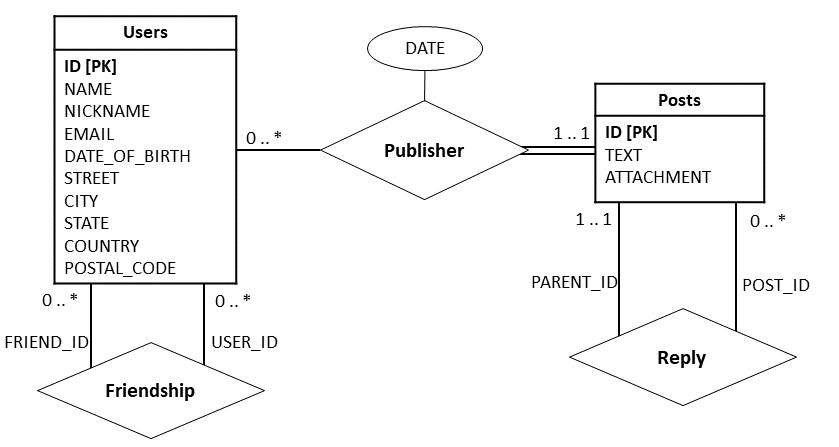

In [54]:
from IPython.display import Image
Image(filename='socialNetworkER.jpg', embed=True)

##### Reduction to Relation Schemas

From diagram above, entity sets and relationship sets can be expressed as
relation schemas that represent the contents of the database;
we can create 5 tables: **Users**, **Posts**, **Publisher**,  **Friendship** and **Reply**.


**Users**

The table contains 10 fields with **ID** as the *PRIMARY KEY*.

| *Attribute*        | *Description*                         |
|:-------------------|:--------------------------------------|
| **ID** [PK]        | User ID                               |
| NAME               | First name                            |
| NICKNAME           | Nickname                              |
| EMAIL              | Email address                         |
| DATE_OF_BIRTH      | Date of birth                         |
| STREET             | Street                                |
| CITY               | City                                  |
| STATE              | State                                 |
| COUNTRY            | Country                               |
| POSTAL_CODE        | Postal code                           |


**Posts**

The table contains 3 fields with **ID** as the *PRIMARY KEY*.

| *Attribute*        | *Description*                         |
|:-------------------|:--------------------------------------|
| **ID** [PK]        | Post ID                               |
| TEXT               | Text of the post                      |
| ATTACHMENT         | Attachment                            |


**Publisher**

The table contains 3 fields with **USER_ID_1** and  **POST_ID_2** as the *PRIMARY KEY*.

| *Attribute*        | *Description*                         |
|:-------------------|:--------------------------------------|
| **USER_ID** [PK]   | User ID                               |
| **POST_ID** [PK]   | Post ID                               |
| DATE               | Date of the post                      |


**Friendship**

The table contains 2 fields with **USER_ID_1** and  **USER_ID_2** as the *PRIMARY KEY*.

| *Attribute*        | *Description*                         |
|:-------------------|:--------------------------------------|
| **USER_ID** [PK]   | User ID                               |
| **FRIEND_ID** [PK] | Friend ID                             |

**Reply**

The table contains 2 fields with **USER_ID_1** and  **USER_ID_2** as the *PRIMARY KEY*.

| *Attribute*               | *Description*                  |
|:--------------------------|:-------------------------------|
| **PARENT_ID** [PK]        | Original Post ID               |
| **POST_ID** [PK]          | Reply Post ID                  |

Note that we could create a separate table for **Address**, but here we suppose that a *user* has only one address. In the same way, we could create a separate table for **Attachment**.

However for sake of simplicity we also denormalize the table **Posts** by merging tables **Posts** and **Reply**.
The denormalized table is as follows.

**Posts**

The table contains 3 fields with **ID** as the *PRIMARY KEY*.

| *Attribute*        | *Description*                         |
|:-------------------|:--------------------------------------|
| **ID** [PK]        | Post ID                               |
| TEXT               | Text of the post                      |
| ATTACHMENT         | Attachment                            |
| PARENT_ID          | Reference to the original post        |

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

##### *Answer:*

There are different ways for selecting relevant posts to display first. We can choose to display:
 
 - The most recent posts, using the date as information
 - the post from the most popular friends by counting the followers of each user
 
We could add to the database new features, such as:

 - level of friendship, for instance based on date of friendship
 - the number of reposts by friends
 - "*like*" feature

We propose to create a view which displays the posts published by friends of the user (including its own posts, for follow_up purpose).
The posts are sorted by topic (i.e. same thread) and by date.

Let's consider a first view:

```sql
CREATE VIEW LastPosts_01 AS 
SELECT Posts.PARENT_ID AS topic, publisher.USER_ID AS "from", 
       Publisher.DATE, Posts.TEXT 
FROM Posts 
    JOIN Publisher ON Posts.ID=publisher.POST_ID
    JOIN Users ON Publisher.USER_ID=Users.ID
WHERE Users.id IN (SELECT Friendship.FRIEND_ID
                   FROM Friendship
                   WHERE Friendship.USER_ID= @loggerID )
      OR Users.ID= @loggerID
ORDER BY topic, Publisher.DATE DESC;
```

The drawback of this *view* is that we have to pass the ID of the user who log in as a variable.
From my knowledge, it is not always possible to use a *view* in this way.

For this reason, we propose below a more complex *view* which can be used at runtime with a `WHERE` clause.

```sql
CREATE VIEW LastPosts_02 AS
SELECT Friendship.FRIEND_ID AS loggerID, Posts.PARENT_ID AS topic,
       Users.ID AS "from", Publisher.DATE, Posts.TEXT 
FROM Friendship
    JOIN Posts ON Friendship.USER_ID=Users.ID
    JOIN Publisher ON Posts.ID=publisher.POST_ID
    JOIN Users ON Publisher.USER_ID=Users.ID
UNION
SELECT Users.ID AS logger, Posts.PARENT_ID AS topic,
       Users.ID, Publisher.DATE, Posts.TEXT
FROM Users
    JOIN Publisher ON Users.ID = Publisher.USER_ID
    JOIN Posts ON Publisher.POST_ID = Posts.ID
ORDER BY topic, Publisher.DATE DESC;
```

### Illustration

Let's illustrate the use of these 2 views with a simple example.
Without lack of generality, we simplify the tables **Users** and **Posts**.

In [55]:
%sql sqlite:///social_network.db

'Connected: @social_network.db'

In [59]:
%%sql sqlite:///social_network.db

-- table 'Users'
DROP TABLE IF EXISTS Users;

CREATE TABLE Users(ID   INTEGER PRIMARY KEY,
                   NAME TEXT);

-- table 'Friendship'
DROP TABLE IF EXISTS Friendship;

CREATE TABLE Friendship(USER_ID   INTEGER,
                        FRIEND_ID INTEGER);
                   
-- table 'Posts'
DROP TABLE IF EXISTS Posts;

CREATE TABLE Posts(ID        INTEGER PRIMARY KEY,
                   TEXT      TEXT,
                   PARENT_ID INTEGER);

-- table 'Publisher'
DROP TABLE IF EXISTS Publisher;

CREATE TABLE Publisher(USER_ID INTEGER,
                       POST_ID INTEGER,
                       DATE      DATE);

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [60]:
%%sql sqlite:///social_network.db

-- table 'Users'
INSERT INTO Users VALUES (1, 'user_01');
INSERT INTO Users VALUES (2, 'user_02');
INSERT INTO Users VALUES (3, 'user_03');
INSERT INTO Users VALUES (4, 'user_04');

-- table 'Friendship'
INSERT INTO Friendship VALUES (1, 2);
INSERT INTO Friendship VALUES (1, 3);
INSERT INTO Friendship VALUES (1, 4);

INSERT INTO Friendship VALUES (2, 1);

INSERT INTO Friendship VALUES (3, 1);
INSERT INTO Friendship VALUES (3, 4);

INSERT INTO Friendship VALUES (4, 1);
INSERT INTO Friendship VALUES (4, 3);


-- table 'Posts'
INSERT INTO Posts VALUES (1, "TOPIC 1 / USER 1::Hello, my friends!", 1);
INSERT INTO Posts VALUES (2, "TOPIC 1 / USER 2::Hello, USER 1!", 1);
INSERT INTO Posts VALUES (3, "TOPIC 1 / USER 3::Hello, USER 1!", 1);

-- table 'Posts'
INSERT INTO Posts VALUES (4, "TOPIC 2 / USER 2::Hello, USER 1!", 4);
INSERT INTO Posts VALUES (5, "TOPIC 2 / USER 1::Hello, USER 2!", 4);


-- table 'Publisher'
INSERT INTO Publisher VALUES (1, 1, "2019-01-01 12:00:00");
INSERT INTO Publisher VALUES (2, 2, "2019-01-01 13:00:00");
INSERT INTO Publisher VALUES (3, 3, "2019-01-01 13:00:00");

INSERT INTO Publisher VALUES (2, 4, "2019-01-01 12:00:00");
INSERT INTO Publisher VALUES (1, 5, "2019-01-01 12:30:00");

Done.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
Done.
1 rows affected.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

### First proposal

In [65]:
%%sql sqlite:///social_network.db

DROP VIEW IF EXISTS LastPosts_01;

CREATE VIEW LastPosts_01 AS 
SELECT Posts.PARENT_ID AS topic, publisher.USER_ID AS "from", 
       Publisher.DATE, Posts.TEXT 
FROM Posts 
    JOIN Publisher ON Posts.ID=publisher.POST_ID
    JOIN Users ON Publisher.USER_ID=Users.ID
WHERE Users.id IN (SELECT Friendship.FRIEND_ID
                   FROM Friendship
                   WHERE Friendship.USER_ID=3)
      OR Users.ID=3
ORDER BY topic, Publisher.DATE DESC;

Done.
Done.


[]

### Second proposal

Maybe more useful as it allows to select the person who logs in at run time.

In [66]:
%%sql sqlite:///social_network.db

DROP VIEW IF EXISTS LastPosts_02;

CREATE VIEW LastPosts_02 AS
SELECT Friendship.FRIEND_ID AS logger, Posts.PARENT_ID AS topic,
       Users.ID AS "from", Publisher.DATE, Posts.TEXT 
FROM Friendship
    JOIN Posts ON Friendship.USER_ID=Users.ID
    JOIN Publisher ON Posts.ID=publisher.POST_ID
    JOIN Users ON Publisher.USER_ID=Users.ID
UNION
SELECT Users.ID AS logger, Posts.PARENT_ID AS topic,
       Users.ID, Publisher.DATE, Posts.TEXT
FROM Users
    JOIN Publisher ON Users.ID = Publisher.USER_ID
    JOIN Posts ON Publisher.POST_ID = Posts.ID
ORDER BY topic, Publisher.DATE DESC;

Done.
Done.


[]

In [67]:
%%sql sqlite:///social_network.db

SELECT topic, "from", date, text
FROM LastPosts_01;

Done.


topic,from,DATE,TEXT
1,3,2019-01-01 13:00:00,"TOPIC 1 / USER 3::Hello, USER 1!"
1,1,2019-01-01 12:00:00,"TOPIC 1 / USER 1::Hello, my friends!"
4,1,2019-01-01 12:30:00,"TOPIC 2 / USER 1::Hello, USER 2!"


In [68]:
%%sql sqlite:///social_network.db

SELECT topic, "from", date, text
FROM LastPosts_02
WHERE logger=3;

Done.


topic,from,DATE,TEXT
1,3,2019-01-01 13:00:00,"TOPIC 1 / USER 3::Hello, USER 1!"
1,1,2019-01-01 12:00:00,"TOPIC 1 / USER 1::Hello, my friends!"
4,1,2019-01-01 12:30:00,"TOPIC 2 / USER 1::Hello, USER 2!"
